In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score


%matplotlib inline

In [2]:
df = pd.read_csv('../Data/train.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#pandas.DataFrame.set_index

In [5]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

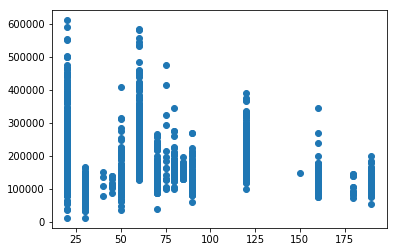

In [6]:
plt.scatter(df['MS SubClass'], df['SalePrice'])

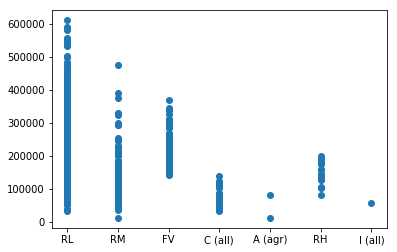

In [7]:
plt.scatter(df['MS Zoning'], df['SalePrice'])

In [8]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [10]:
pd.isnull(df).sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
                  ... 
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area

In [11]:
#df.dropna(axis=1)

In [12]:
df.drop(['PID', 'Fireplace Qu', 'Misc Feature', 'Fence', 'Pool QC', 'Alley'] , axis=1, inplace=True)

In [13]:
#pd.set_option('display.max_columns', 100)
pd.isnull(df).sum()

Id                  0
MS SubClass         0
MS Zoning           0
Lot Frontage      330
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       22
Mas Vnr Area       22
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          55
                 ... 
Gr Liv Area         0
Bsmt Full Bath      2
Bsmt Half Bath      2
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Garage Type       113
Garage Yr Blt     114
Garage Finish     114
Garage Car

In [14]:
pd.isnull(df).columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage A

In [15]:
df.dropna(inplace=True)

In [16]:
df.head()

,Id,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,Inside,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,Inside,...,59,0,0,0,0,0,3,2010,WD,138500
5,138,20,RL,137.0,16492,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,0,0,6,2010,WD,190000


In [17]:
#[(df.corr() >= 0.5) for i in df]

count      1556.000000
mean     186225.881105
std       82116.659278
min       12789.000000
25%      132000.000000
50%      165000.000000
75%      215000.000000
max      611657.000000
Name: SalePrice, dtype: float64


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


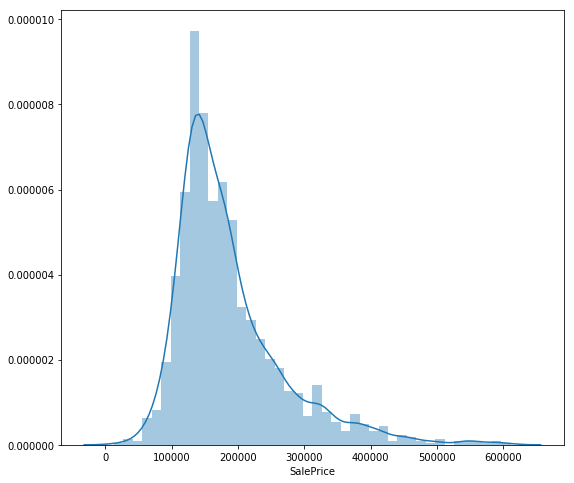

In [18]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice']);

In [19]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [20]:
df_cat = df.select_dtypes(include = ['object'])

In [21]:
df_cat.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type'],
      dtype='object')

In [22]:
pd.get_dummies(df_cat['MS Zoning'])

,C (all),FV,RH,RL,RM
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,0,1
9,0,0,0,1,0
10,0,0,0,0,1
11,0,0,0,1,0
13,0,1,0,0,0


In [23]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
1,544,60,43.0,11492,7,5,1996,1997,132.0,637.0,...,0,74,0,0,0,0,0,4,2009,220000
2,153,20,68.0,7922,5,7,1953,2007,0.0,731.0,...,0,52,0,0,0,0,0,1,2010,109000
3,318,60,73.0,9802,5,5,2006,2007,0.0,0.0,...,100,0,0,0,0,0,0,4,2010,174000
4,255,50,82.0,14235,6,8,1900,1993,0.0,0.0,...,0,59,0,0,0,0,0,3,2010,138500
5,138,20,137.0,16492,6,6,1966,2002,0.0,247.0,...,0,0,0,0,0,0,0,6,2010,190000


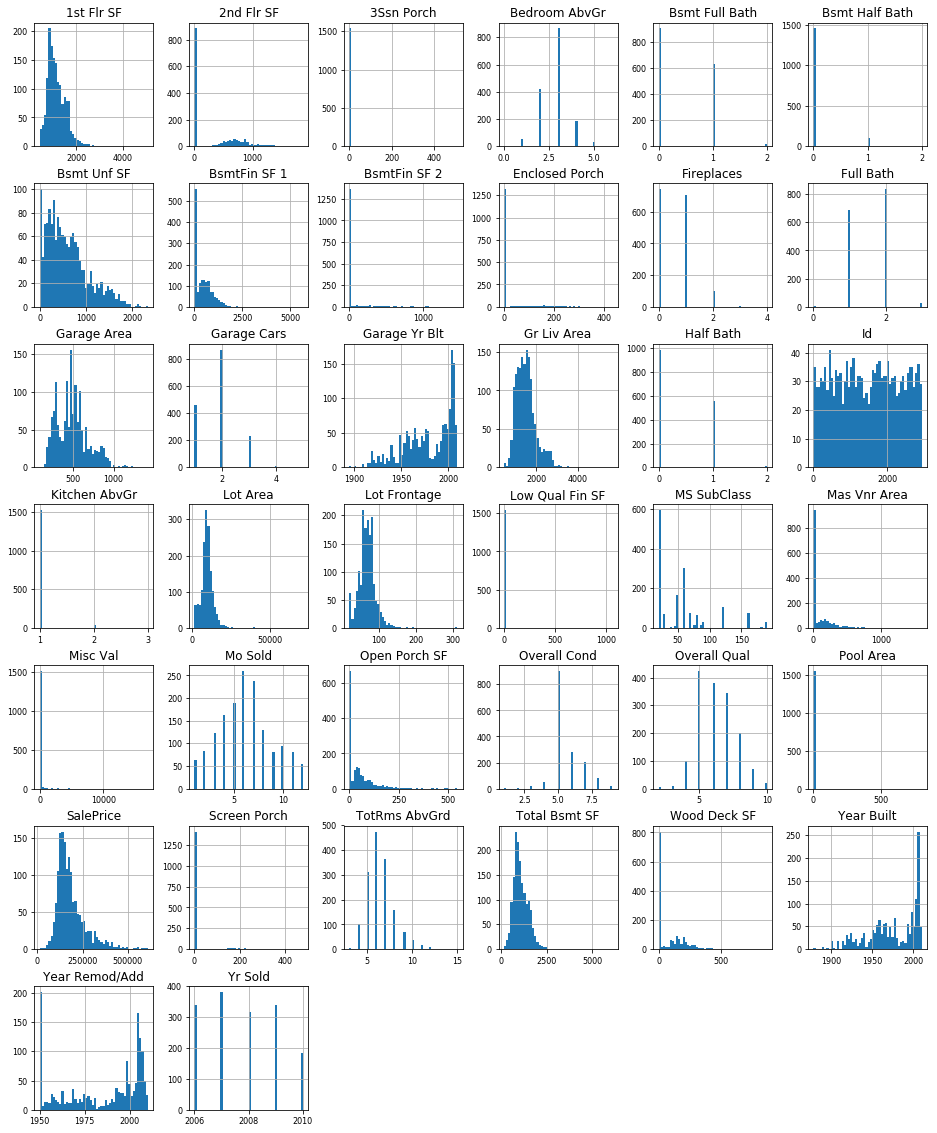

In [24]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [25]:
df_num_corr = df_num.corr()['SalePrice'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print(golden_features_list)

Overall Qual      0.806921
Gr Liv Area       0.708218
Garage Cars       0.672929
Garage Area       0.672298
1st Flr SF        0.641073
Total Bsmt SF     0.636414
Year Built        0.567054
Full Bath         0.560577
Garage Yr Blt     0.550117
TotRms AbvGrd     0.547071
Year Remod/Add    0.547044
Mas Vnr Area      0.533399
Name: SalePrice, dtype: float64


In [26]:
individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items())
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

     1st Flr SF: 0.6410729657127844
     2nd Flr SF: 0.6904060792685526
     3Ssn Porch: 0.0983971547957314
  Bedroom AbvGr: 0.14036459319262748
 Bsmt Full Bath: 0.075868210917214
 Bsmt Half Bath: 0.18855378075845913
    Bsmt Unf SF: 0.175467104179825
   BsmtFin SF 1: 0.4985993034103202
   BsmtFin SF 2: 0.3561469137541418
 Enclosed Porch: 0.09710290109585214
     Fireplaces: 0.08986445761213413
      Full Bath: 0.5730515592442584
    Garage Area: 0.6722975302075584
    Garage Cars: 0.6729291689701634
  Garage Yr Blt: 0.550117024747928
    Gr Liv Area: 0.7082175599429739
      Half Bath: -0.07529500079616841
             Id: -0.06457792392211996
  Kitchen AbvGr: -0.08010685968856195
       Lot Area: 0.39507982669507435
   Lot Frontage: 0.3501586839986716
Low Qual Fin SF: 0.2796364881895395
    MS SubClass: -0.08524400593407298
   Mas Vnr Area: 0.4526172817695138
       Misc Val: 0.20568476232979516
        Mo Sold: 0.026425268442462894
  Open Porch SF: 0.09951678816932663
   Overall Con

In [27]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]

In [28]:
golden_features_list

['1st Flr SF',
 '2nd Flr SF',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Overall Qual',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Year Built',
 'Year Remod/Add']

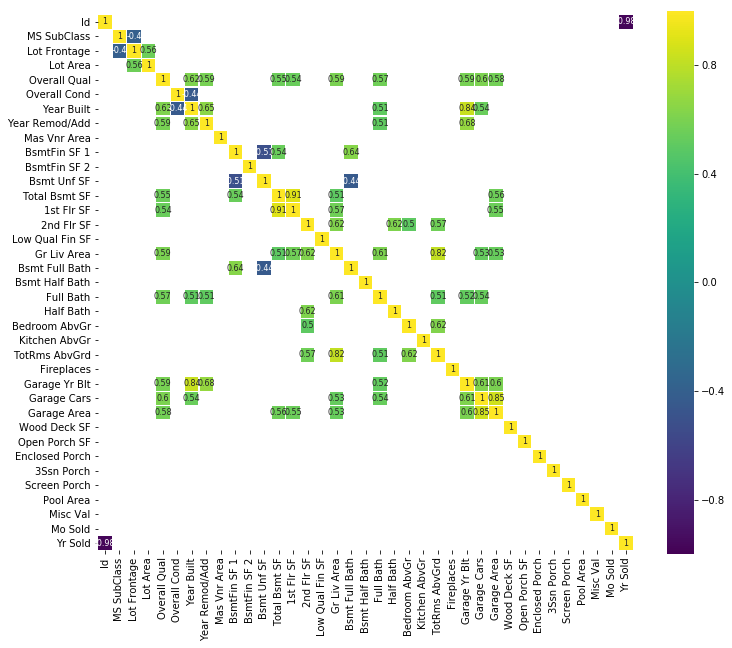

In [29]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [30]:
features = ['1st Flr SF',
 '2nd Flr SF',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Overall Qual',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Year Built',
 'Year Remod/Add']

X = df[features]
y = df['SalePrice']

In [31]:
df.columns

Index(['Id', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage A

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)


lr.fit(X_train_sc, y_train)
lr.score(X_train_sc, y_train)

0.8036794090200827

In [33]:
lr.score(X_test_sc, y_test)

0.740939769064941

In [34]:
kaggle = pd.read_csv('../Data/test.csv', index_col = 'Id')

In [35]:
kaggle.shape

(879, 79)

In [36]:
kaggle = kaggle.select_dtypes(exclude='object')
kaggle.fillna(0, inplace=True)
kaggle.drop('PID', 1, inplace=True)
#kaggle.dropna(inplace=True)
#kaggle.drop(['PID', 'Fireplace Qu', 'Misc Feature', 'Fence', 'Pool QC', 'Alley'] , axis=1, inplace=True)

In [37]:
X_train.shape

(1167, 12)

In [38]:
kaggle_test = kaggle.filter(items=['1st Flr SF',
 '2nd Flr SF',
 'Full Bath',
 'Garage Area',
 'Garage Cars',
 'Garage Yr Blt',
 'Gr Liv Area',
 'Overall Qual',
 'TotRms AbvGrd',
 'Total Bsmt SF',
 'Year Built',
 'Year Remod/Add'])

In [39]:
kaggle_sc = ss.transform(kaggle_test)

In [40]:
preds = lr.predict(kaggle_sc)

In [41]:
kaggle.shape

(879, 36)

In [42]:
kaggle_test.shape

(879, 12)

In [43]:
kaggle_sc.shape

(879, 12)

In [44]:
submission = pd.DataFrame(preds, index=kaggle.index, columns=['SalePrice'])

In [45]:
#kaggle[X.columns].head()

In [46]:
submission.shape

(879, 1)

In [47]:
submission.sort_index(inplace=True)

In [48]:
submission.to_csv('./numeric_only_lr.csv')

In [49]:
!head ./numeric_only_lr.csv

Id,SalePrice
2,122049.02448639463
4,261171.62883839972
6,184742.15587802397
7,231878.13919982873
17,224479.05418266752
18,332964.12249792786
22,174939.52257450216
27,101963.81307267926
31,100205.01025728899


In [50]:
X.columns

Index(['1st Flr SF', '2nd Flr SF', 'Full Bath', 'Garage Area', 'Garage Cars',
       'Garage Yr Blt', 'Gr Liv Area', 'Overall Qual', 'TotRms AbvGrd',
       'Total Bsmt SF', 'Year Built', 'Year Remod/Add'],
      dtype='object')

In [51]:
kaggle_test.columns

Index(['1st Flr SF', '2nd Flr SF', 'Full Bath', 'Garage Area', 'Garage Cars',
       'Garage Yr Blt', 'Gr Liv Area', 'Overall Qual', 'TotRms AbvGrd',
       'Total Bsmt SF', 'Year Built', 'Year Remod/Add'],
      dtype='object')